## Final Task - Clustering Model
* **Virtual Internship Experience (VIX) Program batch Oktober 2023**
* **Data Science - Rakamin x Kalbe Nutritionals**

*Created by: Rakaputra*

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

#### **Load/Import Dataset**

In [2]:
df_customer = pd.read_csv("../dataset/Case Study - Customer.csv", sep=";")
df_transaction = pd.read_csv("../dataset/Case Study - Transaction.csv", sep=";")

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [4]:
df_customer.sample(5)

,CustomerID,Age,Gender,Marital Status,Income
272,273,27,1,Married,"3,32"
105,106,24,0,Single,"6,79"
368,369,32,0,Married,"10,62"
150,151,42,0,Married,"10,38"
234,235,37,0,Married,"5,35"


In [5]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [6]:
df_transaction.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3677,TR4318,234,24/09/2022,P1,8800,5,44000,11
73,TR61437,123,05/01/2022,P1,8800,4,35200,6
4845,TR8122,388,19/12/2022,P5,4200,2,8400,10
435,TR77509,444,31/01/2022,P5,4200,3,12600,4
646,TR89248,73,16/02/2022,P3,7500,6,45000,2


#### **Data Cleaning & Preprocessing**
* Pengisian nilai kosong pada data Customer

In [7]:
list(df_customer["Marital Status"].unique())

['Married', nan, 'Single']

In [8]:
df_customer[df_customer["Marital Status"].isna()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [9]:
df_customer.loc[df_customer["Age"] < 30, "Marital Status"].mode()

0    Single
Name: Marital Status, dtype: object

In [10]:
df_customer.loc[df_customer["Age"] >= 30, "Marital Status"].mode()

0    Married
Name: Marital Status, dtype: object

In [11]:
df_customer.loc[
    df_customer["Marital Status"].isna(), "Marital Status"
] = np.where(df_customer[df_customer["Marital Status"].isna()]["Age"] >= 30,
             "Married", "Single")

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


Transformasi data "Income" pada dataset "Customer" dan "Date" pada dataset "Transaction"

In [12]:
df_customer["Income"] = df_customer["Income"].map(lambda x: float(x.replace(",", ".")))
df_transaction["Date"] = pd.to_datetime(df_transaction["Date"], format="%d/%m/%Y")

In [13]:
df_customer.sample(5)

,CustomerID,Age,Gender,Marital Status,Income
442,443,33,1,Married,9.28
384,385,41,1,Married,15.84
152,153,36,1,Married,9.54
218,219,39,0,Single,9.73
326,327,50,0,Married,12.41


In [14]:
df_transaction.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3435,TR99723,417,2022-09-07,P7,9400,5,47000,11
4755,TR38604,268,2022-12-12,P10,15000,4,60000,6
1124,TR67254,356,2022-03-19,P1,8800,2,17600,11
1176,TR59219,392,2022-03-24,P7,9400,4,37600,12
697,TR9376,240,2022-02-20,P7,9400,4,37600,9


#### **Merge into single Dataframe**

In [15]:
df_merge = pd.merge(df_transaction, df_customer, on="CustomerID")
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 509.8+ KB


In [16]:
new_cols_head = ["Date",
                 "TransactionID",
                 "CustomerID",
                 "Age",
                 "Gender",
                 "Marital Status",
                 "Income",
                 "ProductID",
                 "Price",
                 "Qty",
                 "TotalAmount",
                 "StoreID"]

df_merge = df_merge[new_cols_head]
df_merge.sample(5)

,Date,TransactionID,CustomerID,Age,Gender,Marital Status,Income,ProductID,Price,Qty,TotalAmount,StoreID
562,2022-06-15,TR84686,23,57,1,Married,12.56,P8,16000,1,16000,4
3174,2022-03-30,TR78109,410,55,1,Married,8.68,P9,10000,3,30000,13
4542,2022-03-11,TR83227,155,40,0,Married,7.17,P5,4200,3,12600,12
4599,2022-09-03,TR78094,35,48,1,Married,10.58,P2,3200,7,22400,7
1460,2022-05-29,TR63418,229,32,0,Married,10.17,P5,4200,3,12600,1


#### **Data Clustering**
* Agregasi data

In [17]:
aggregation = {
    "TransactionID": "count",
    "Qty": "sum",
    "TotalAmount": "sum",
}

df_cluster = df_merge.groupby("CustomerID").aggregate(aggregation).reset_index()
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     447 non-null    int64
 1   TransactionID  447 non-null    int64
 2   Qty            447 non-null    int64
 3   TotalAmount    447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [18]:
df_cluster.sample(5)

,CustomerID,TransactionID,Qty,TotalAmount
401,402,6,24,188800
379,380,13,44,356700
178,179,7,26,170200
90,91,7,32,282800
209,210,13,58,570600


Penyeragaman skala data

In [19]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_cluster[["TransactionID", "Qty", "TotalAmount"]])
df_scaler = pd.DataFrame(df_scaler, columns=["TransactionID", "Qty", "TotalAmount"])
df_scaler.sample(5)

,TransactionID,Qty,TotalAmount
426,0.854367,1.104137,1.705193
276,0.545884,0.790224,1.698767
124,-1.613497,-1.878033,-1.811420
102,-0.071082,-0.779339,-0.355937
375,0.237401,1.025658,0.426425


Menentukan n cluster optimal

In [20]:
warnings.filterwarnings("ignore")

inertia = []
max_clusters = 12
for cluster in range(1, max_clusters):
    kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=cluster)
    kmeans.fit(df_cluster.drop("CustomerID", axis=1))
    inertia.append(kmeans.inertia_)

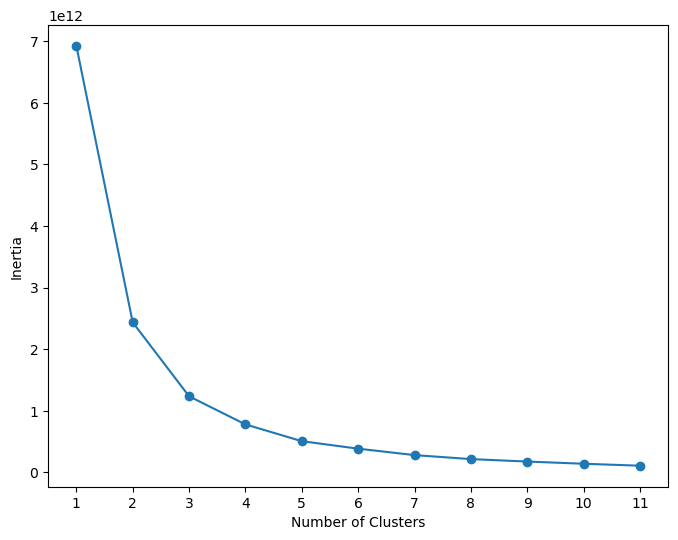

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, max_clusters), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(np.arange(1, max_clusters))
plt.show()

Clustering

In [22]:
df_cluster.drop("CustomerID", axis=1, inplace=True)
clusters = 3
kmeans = KMeans(n_clusters=clusters, random_state=42, n_init=clusters)
kmeans.fit(df_cluster)
df_cluster["cluster"] = kmeans.labels_

<Figure size 800x800 with 0 Axes>

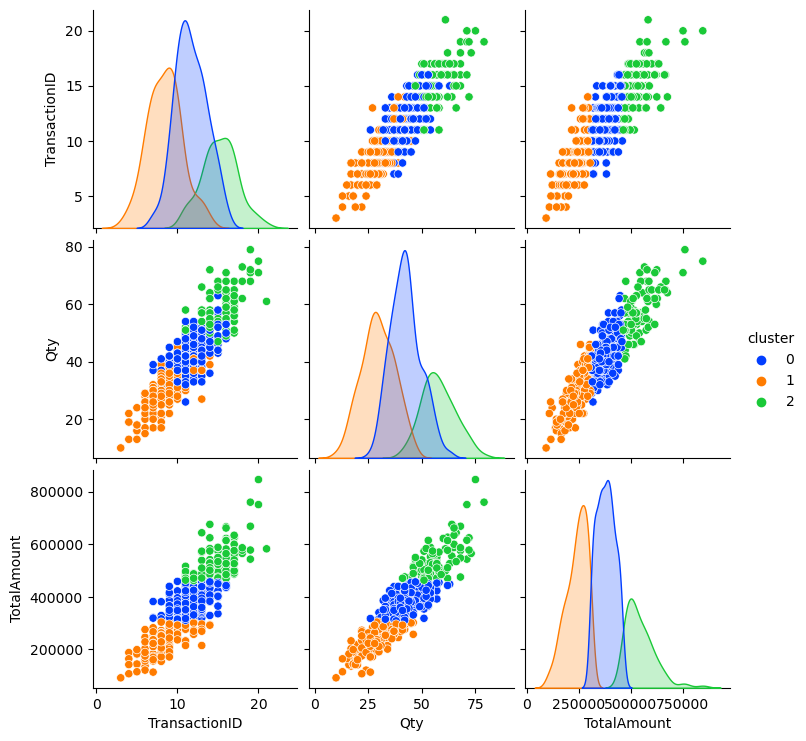

In [23]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(8, 8))
sn.pairplot(data=df_cluster, hue="cluster", palette="bright")
plt.show()